# Ch4 Fourier Transform

This notebook explores the **Fourier Transform** from both theoretical and computational perspectives, emphasizing the **basis function interpretation** of periodic signal decomposition.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 4.2 Fourier Series

In this section, we'll explore how Fourier series represents functions as linear combinations of trigonometric basis functions, where **Fourier coefficients act as coordinates** in this infinite-dimensional function space.

By Euler's formula ($e^{i\omega t} = \cos(\omega t) + i\sin(\omega t)$), periodic functions can also be expressed using **complex exponential basis** $\{e^{in\omega t}\}$. While the complex form is mathematically more elegant, we use the **trigonometric basis** $\{\cos(n\omega t), \sin(n\omega t)\}$ here for better **intuitive visualization** and **physical interpretation**. Both approaches are mathematically equivalent.

In [11]:
# Define the trigonometric basis functions
def basis_function(t, n, period=2*np.pi, func_type='cos'):
    """
    Trigonometric basis functions for Fourier series
    
    Args:
        t: time array
        n: harmonic number (0 for DC, 1 for fundamental, 2 for 2nd harmonic, etc.)
        period: period of the function
        func_type: 'cos', 'sin', or 'dc' (DC component)
    """
    omega = 2 * np.pi / period
    
    if func_type == 'dc' or n == 0:
        return np.ones_like(t) / np.sqrt(period/2)  # Normalized DC component
    elif func_type == 'cos':
        return np.cos(n * omega * t) * np.sqrt(2/(period/2))  # Normalized cosine
    elif func_type == 'sin':
        return np.sin(n * omega * t) * np.sqrt(2/(period/2))  # Normalized sine
    else:
        raise ValueError("func_type must be 'dc', 'cos', or 'sin'")

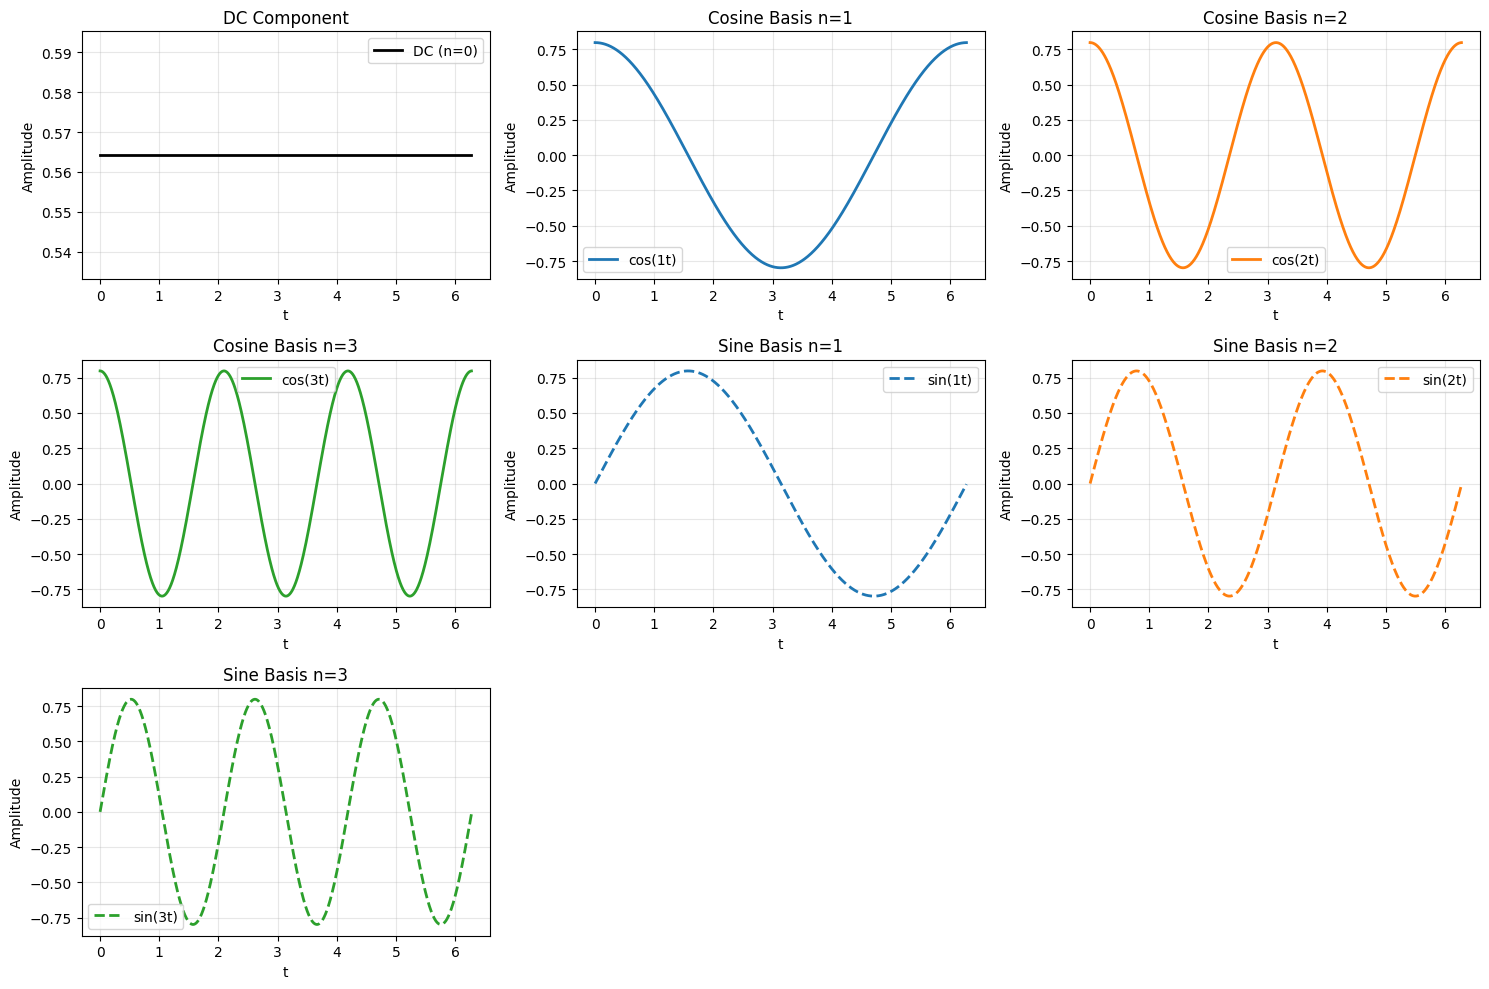

Basis functions form an orthonormal set over period T = 6.28
These are the 'coordinate axes' of our function space


In [12]:
# Time domain setup
T = 2 * np.pi  # Period
N_samples = 1000
t = np.linspace(0, T, N_samples, endpoint=False)

# Visualize the first few basis functions
plt.figure(figsize=(15, 10))

# DC(mean, bias) component
plt.subplot(3, 3, 1)
dc_basis = basis_function(t, 0, T, 'dc')
plt.plot(t, dc_basis, 'k-', linewidth=2, label='DC (n=0)')
plt.title('DC Component')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Cosine basis functions
for n in range(1, 4): # First three harmonics
    plt.subplot(3, 3, 1 + n)
    cos_basis = basis_function(t, n, T, 'cos')
    plt.plot(t, cos_basis, f'C{n-1}-', linewidth=2, label=f'cos({n}t)')
    plt.title(f'Cosine Basis n={n}')
    plt.xlabel('t')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

# Sine basis functions  
for n in range(1, 4):
    plt.subplot(3, 3, 4 + n)
    sin_basis = basis_function(t, n, T, 'sin')
    plt.plot(t, sin_basis, f'C{n-1}--', linewidth=2, label=f'sin({n}t)')
    plt.title(f'Sine Basis n={n}')
    plt.xlabel('t')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

print(f"Basis functions form an orthonormal set over period T = {T:.2f}")
print("These are the 'coordinate axes' of our function space")

C:\Users\shin0\AppData\Local\Temp\ipykernel_22640\3845542986.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  coefficient = np.trapz(func * basis, dx=dt)


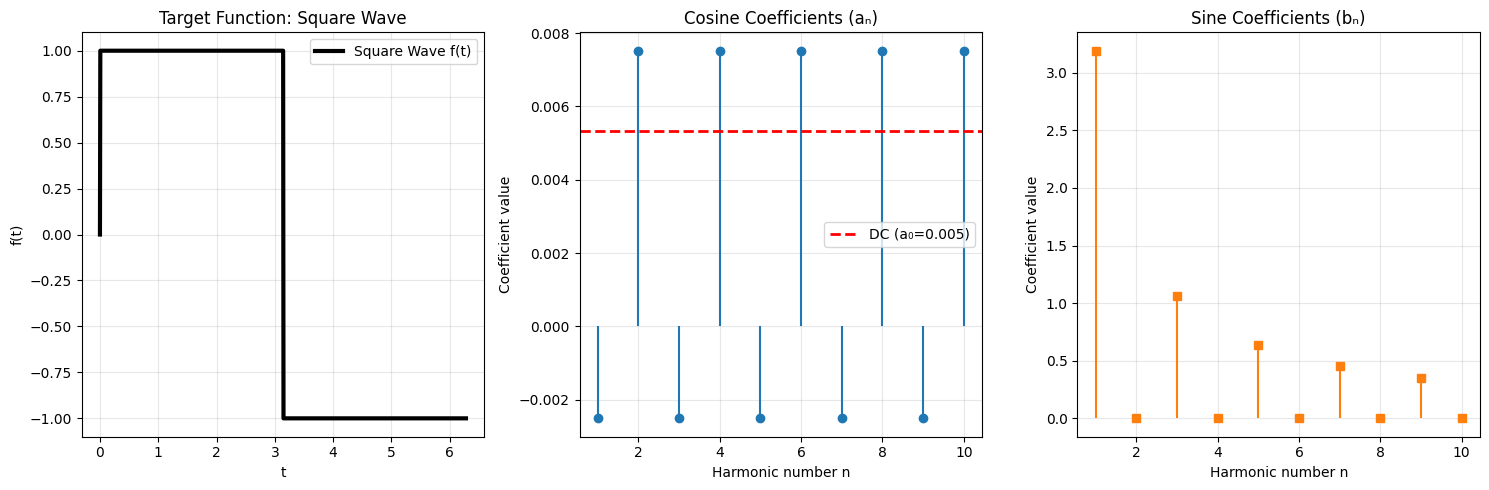

DC coefficient (a₀): 0.005317
First 5 cosine coefficients (aₙ): ['-0.002507', '0.007520', '-0.002507', '0.007519', '-0.002508']
First 5 sine coefficients (bₙ): ['3.191512', '-0.000031', '1.063767', '-0.000063', '0.638176']

These coefficients are the 'coordinates' of our square wave in the trigonometric basis


In [13]:
# Define target functions to decompose
def square_wave(t, period=2*np.pi, amplitude=1):
    """Square wave function"""
    return amplitude * np.sign(np.sin(2*np.pi*t/period))

# Fourier coefficient calculation using inner product (projection)
def compute_fourier_coefficient(func, t, n, period=2*np.pi, func_type='cos'):
    """
    Compute Fourier coefficient as inner product (projection onto basis function)
    This is the 'coordinate' of the function in the direction of the basis function
    """
    dt = t[1] - t[0]  # Time step
    basis = basis_function(t, n, period, func_type)
    
    # Inner product: <f, basis> = ∫ f(t) * basis(t) dt
    coefficient = np.trapz(func * basis, dx=dt)
    
    return coefficient

# Choose target function - square wave
target_func = square_wave(t, T)

# Compute Fourier coefficients (coordinates in basis)
max_harmonics = 10
a0 = compute_fourier_coefficient(target_func, t, 0, T, 'dc')  # DC coefficient
a_coeffs = [compute_fourier_coefficient(target_func, t, n, T, 'cos') for n in range(1, max_harmonics+1)]
b_coeffs = [compute_fourier_coefficient(target_func, t, n, T, 'sin') for n in range(1, max_harmonics+1)]

# Visualize the coefficients (coordinates)
plt.figure(figsize=(15, 5))

# Original function
plt.subplot(1, 3, 1)
plt.plot(t, target_func, 'k-', linewidth=3, label='Square Wave f(t)')
plt.title('Target Function: Square Wave')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True, alpha=0.3)
plt.legend()

# Cosine coefficients (a_n)
plt.subplot(1, 3, 2)
harmonics = range(1, max_harmonics+1)
plt.stem(harmonics, a_coeffs, basefmt='none', linefmt='C0-', markerfmt='C0o')
plt.axhline(y=a0, color='red', linestyle='--', linewidth=2, label=f'DC (a₀={a0:.3f})')
plt.title('Cosine Coefficients (aₙ)')
plt.xlabel('Harmonic number n')
plt.ylabel('Coefficient value')
plt.grid(True, alpha=0.3)
plt.legend()

# Sine coefficients (b_n)
plt.subplot(1, 3, 3)
plt.stem(harmonics, b_coeffs, basefmt='none', linefmt='C1-', markerfmt='C1s')
plt.title('Sine Coefficients (bₙ)')
plt.xlabel('Harmonic number n')
plt.ylabel('Coefficient value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"DC coefficient (a₀): {a0:.6f}")
print(f"First 5 cosine coefficients (aₙ): {[f'{a:.6f}' for a in a_coeffs[:5]]}")
print(f"First 5 sine coefficients (bₙ): {[f'{b:.6f}' for b in b_coeffs[:5]]}")
print("\nThese coefficients are the 'coordinates' of our square wave in the trigonometric basis")

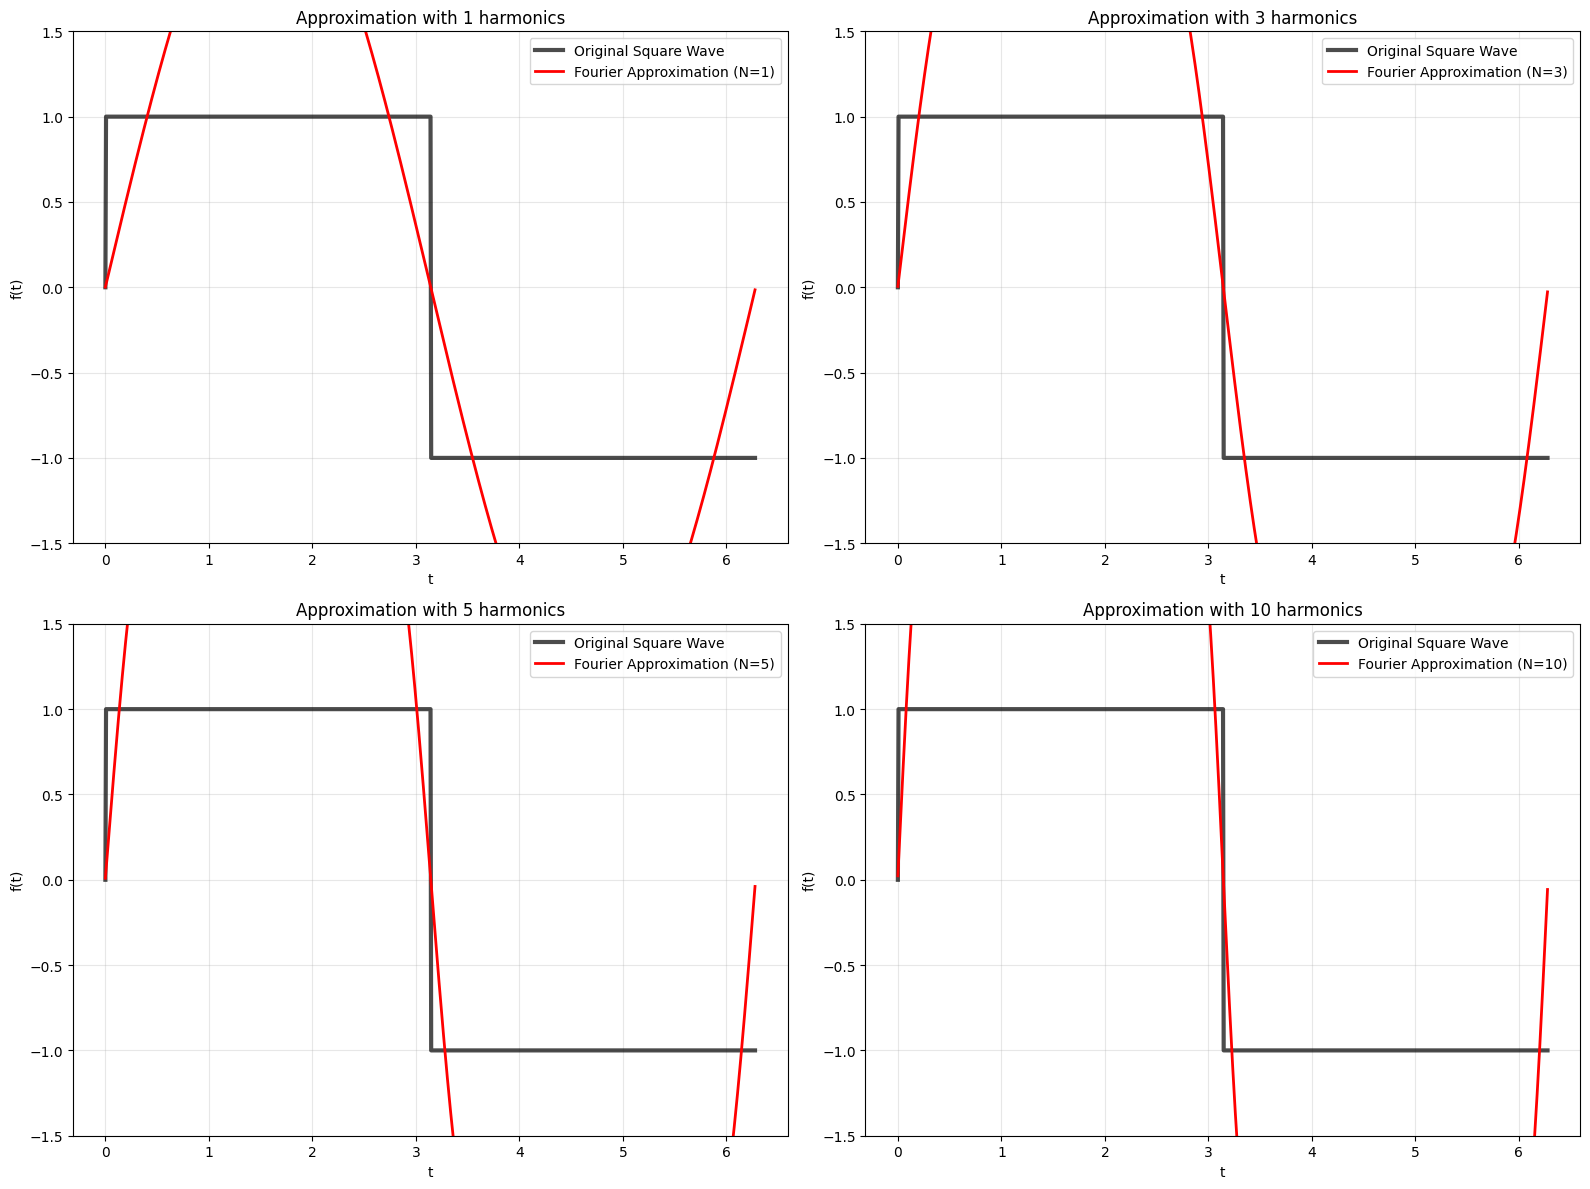

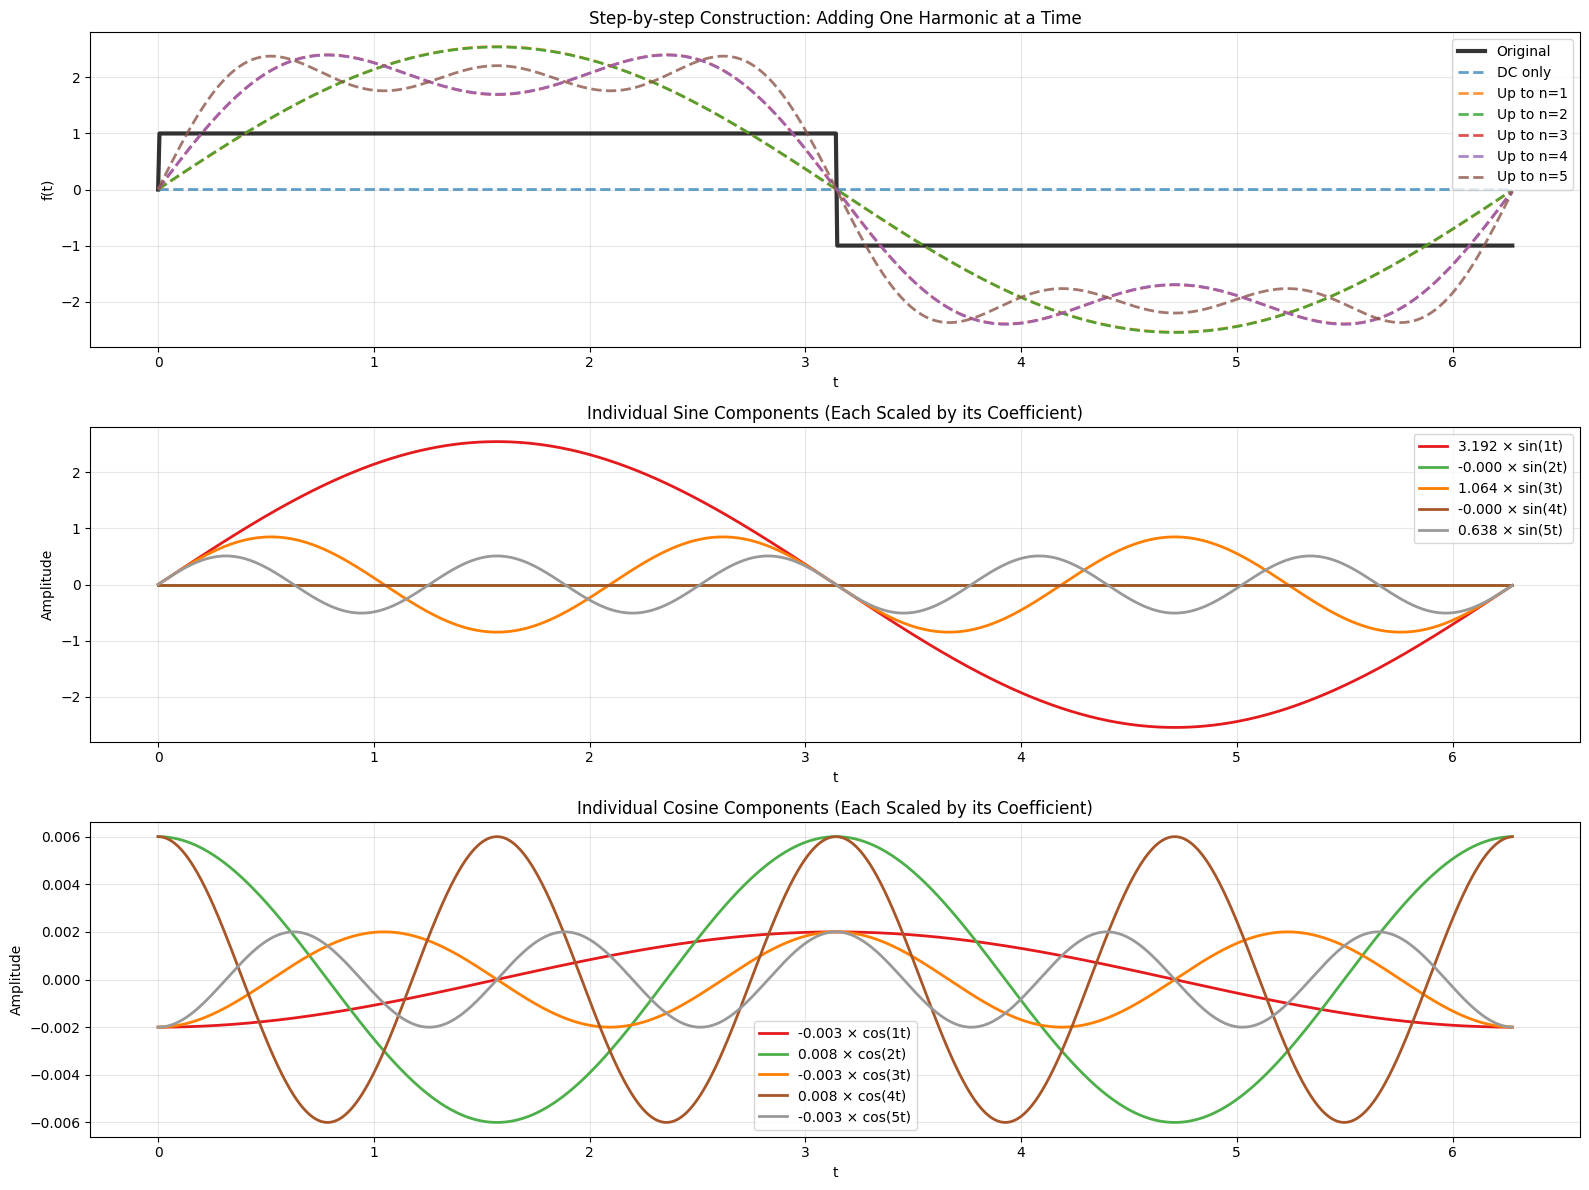

Key Insight:
• Each Fourier coefficient is the 'coordinate' along a basis function
• The function is reconstructed as: f(t) = Σ [coefficient × basis_function]
• More terms = better approximation (like using more dimensions in vector space)


In [14]:
# Reconstruct function using partial sums (finite number of basis functions)
def fourier_partial_sum(t, a0, a_coeffs, b_coeffs, N_terms, period=2*np.pi):
    """
    Reconstruct function using N_terms of Fourier series
    This shows how we build up the function by adding basis functions with their coordinates
    """
    # Start with DC component
    result = a0 * basis_function(t, 0, period, 'dc')
    
    # Add cosine and sine terms up to N_terms
    for n in range(1, min(N_terms+1, len(a_coeffs)+1)):
        if n-1 < len(a_coeffs):
            result += a_coeffs[n-1] * basis_function(t, n, period, 'cos')
        if n-1 < len(b_coeffs):
            result += b_coeffs[n-1] * basis_function(t, n, period, 'sin')
    
    return result

# Show progressive approximation
plt.figure(figsize=(16, 12))

# Different numbers of terms to show
N_terms_list = [1, 3, 5, 10]

for i, N_terms in enumerate(N_terms_list):
    plt.subplot(2, 2, i+1)
    
    # Compute partial sum
    approx = fourier_partial_sum(t, a0, a_coeffs, b_coeffs, N_terms, T)
    
    # Plot original and approximation
    plt.plot(t, target_func, 'k-', linewidth=3, label='Original Square Wave', alpha=0.7)
    plt.plot(t, approx, 'r-', linewidth=2, label=f'Fourier Approximation (N={N_terms})')
    
    plt.title(f'Approximation with {N_terms} harmonics')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# Show individual contributions
plt.figure(figsize=(16, 12))

# Show how each term contributes
N_show = 5
plt.subplot(3, 1, 1)
plt.plot(t, target_func, 'k-', linewidth=3, label='Original', alpha=0.8)

# Build approximation step by step
running_sum = a0 * basis_function(t, 0, T, 'dc')
plt.plot(t, running_sum, '--', linewidth=2, alpha=0.7, label='DC only')

for n in range(1, N_show+1):
    if n-1 < len(a_coeffs) and abs(a_coeffs[n-1]) > 1e-10:
        running_sum += a_coeffs[n-1] * basis_function(t, n, T, 'cos')
    if n-1 < len(b_coeffs) and abs(b_coeffs[n-1]) > 1e-10:
        running_sum += b_coeffs[n-1] * basis_function(t, n, T, 'sin')
    
    plt.plot(t, running_sum, '--', linewidth=2, alpha=0.8, 
             label=f'Up to n={n}')

plt.title('Step-by-step Construction: Adding One Harmonic at a Time')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True, alpha=0.3)
plt.legend()

# Show individual terms scaled by their coefficients
plt.subplot(3, 1, 2)
colors = plt.cm.Set1(np.linspace(0, 1, N_show))

for n in range(1, N_show+1):
    if n-1 < len(b_coeffs) and abs(b_coeffs[n-1]) > 1e-10:
        term = b_coeffs[n-1] * basis_function(t, n, T, 'sin')
        plt.plot(t, term, color=colors[n-1], linewidth=2, 
                 label=f'{b_coeffs[n-1]:.3f} × sin({n}t)')

plt.title('Individual Sine Components (Each Scaled by its Coefficient)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Show individual cosine terms scaled by their coefficients
plt.subplot(3, 1, 3)
for n in range(1, N_show+1):
    if n-1 < len(a_coeffs) and abs(a_coeffs[n-1]) > 1e-10:
        term = a_coeffs[n-1] * basis_function(t, n, T, 'cos')
        plt.plot(t, term, color=colors[n-1], linewidth=2, 
                 label=f'{a_coeffs[n-1]:.3f} × cos({n}t)')
plt.title('Individual Cosine Components (Each Scaled by its Coefficient)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Key Insight:")
print("• Each Fourier coefficient is the 'coordinate' along a basis function")
print("• The function is reconstructed as: f(t) = Σ [coefficient × basis_function]")
print("• More terms = better approximation (like using more dimensions in vector space)")

## 4.3 Fourier Transform

### 4.3.1 Discrete Fourier Trnasform

In [ ]:
# DFT / IDFT (O(n^2) complexity)
def dft(x: np.ndarray) -> np.ndarray:
    """
    Compute Discrete Fourier Transform using matrix multiplication approach.
    
    The DFT transforms a sequence of N time-domain samples into N frequency-domain samples.
    It computes: X[k] = Σ(n=0 to N-1) x[n] * e^(-2πikn/N)
    
    This is equivalent to multiplying the input vector by the DFT matrix W, where
    W[k,n] = e^(-2πikn/N) are the complex exponential basis functions.
    
    Args:
        x: Input time-domain signal (1D array)
        
    Returns:
        X: Frequency-domain representation (complex 1D array)
        
    Time Complexity: O(N²) - direct matrix multiplication
    Space Complexity: O(N²) - stores the full DFT matrix
    
    Note: This implementation creates the full DFT matrix explicitly for educational purposes.
    """
    x = np.asarray(x, dtype=np.complex128)
    n = x.size
    k = np.arange(n).reshape(-1, 1)      # frequency indices (n,1)
    nvec = np.arange(n).reshape(1, -1)   # time indices (1,n)
    W = np.exp(-2j * np.pi * k * nvec / n)  # DFT matrix: W[k,n] = e^(-2πikn/N)
    return W @ x

def idft(X: np.ndarray) -> np.ndarray:
    """
    Compute Inverse Discrete Fourier Transform.
    
    The IDFT transforms frequency-domain samples back to time-domain samples.
    It computes: x[n] = (1/N) * Σ(k=0 to N-1) X[k] * e^(2πikn/N)
    
    This is equivalent to multiplying by the inverse DFT matrix and scaling by 1/N.
    The inverse DFT matrix has W_inv[k,n] = e^(2πikn/N) (note the positive sign).
    
    Args:
        X: Input frequency-domain signal (complex 1D array)
        
    Returns:
        x: Reconstructed time-domain signal (complex 1D array)
        
    Time Complexity: O(N²)
    Space Complexity: O(N²)
    
    Note: For real input signals, the result should have negligible imaginary part.
    """
    X = np.asarray(X, dtype=np.complex128)
    n = X.size
    k = np.arange(n).reshape(-1, 1)
    nvec = np.arange(n).reshape(1, -1)
    W = np.exp(2j * np.pi * k * nvec / n)  # Inverse DFT matrix (positive exponent)
    return (W @ X) / n  # Don't forget the 1/N scaling factor!

### 4.3.2 Fast Fourier Transform; FFT

In [16]:
# Recursive Cooley-Tukey FFT / IFFT (radix-2)
# Input length must be a power of 2
def fft_recur(x: np.ndarray) -> np.ndarray:
    """
    Compute Fast Fourier Transform using Cooley-Tukey radix-2 algorithm.
    
    The FFT is a divide-and-conquer algorithm that recursively splits the DFT computation
    into smaller DFTs of even and odd indexed samples, achieving O(N log N) complexity.
    
    Algorithm:
    1. Base case: if N=1, return the single sample
    2. Split input into even and odd indexed samples: x[::2] and x[1::2] 
    3. Recursively compute FFT of both halves
    4. Combine results using twiddle factors: W_N^k = e^(-2πik/N)
    5. X[k] = X_even[k] + W_N^k * X_odd[k] for k = 0..N/2-1
    6. X[k+N/2] = X_even[k] - W_N^k * X_odd[k] for k = 0..N/2-1
    
    Args:
        x: Input time-domain signal (1D array), length must be power of 2
        
    Returns:
        X: Frequency-domain representation (complex 1D array)
        
    Time Complexity: O(N log N) - each level processes N samples, log N levels
    Space Complexity: O(log N) - recursion depth
    
    Raises:
        ValueError: If input length is not a power of 2
        
    Note: This radix-2 algorithm requires N to be a power of 2 for optimal performance.
    """
    x = np.asarray(x, dtype=np.complex128)
    n = x.size
    
    # Base case: single sample
    if n == 1:
        return x
        
    # Check if length is power of 2
    if n & (n - 1) != 0:
        raise ValueError("fft_recur: input length must be a power of 2")
    
    # Divide: split into even and odd samples
    X_even = fft_recur(x[::2])   # FFT of even-indexed samples: x[0], x[2], x[4], ...
    X_odd  = fft_recur(x[1::2])  # FFT of odd-indexed samples: x[1], x[3], x[5], ...
    
    # Conquer: combine using twiddle factors
    # Twiddle factors: W_N^k = e^(-2πik/N) for k = 0, 1, ..., N/2-1
    tw = np.exp(-2j * np.pi * np.arange(n // 2) / n) * X_odd
    
    # Butterfly operation: combine even and odd parts
    return np.concatenate([X_even + tw,   # First half: X[k] = X_even[k] + W^k * X_odd[k]
                          X_even - tw])   # Second half: X[k+N/2] = X_even[k] - W^k * X_odd[k]

def ifft_recur(X: np.ndarray) -> np.ndarray:
    """
    Compute Inverse Fast Fourier Transform using recursive Cooley-Tukey algorithm.
    
    The IFFT uses the same divide-and-conquer approach as FFT but with:
    1. Positive exponent in twiddle factors: W_N^k = e^(+2πik/N)
    2. Scaling by 1/2 at each recursion level (or equivalently, 1/N at the end)
    
    The mathematical relationship: IFFT(X) = (1/N) * conj(FFT(conj(X)))
    But this implementation uses the direct recursive approach for clarity.
    
    Args:
        X: Input frequency-domain signal (complex 1D array), length must be power of 2
        
    Returns:
        x: Reconstructed time-domain signal (complex 1D array)
        
    Time Complexity: O(N log N)
    Space Complexity: O(log N)
    
    Raises:
        ValueError: If input length is not a power of 2
        
    Note: The scaling factor 1/N is distributed across recursion levels as 1/2 per level.
    """
    X = np.asarray(X, dtype=np.complex128)
    n = X.size
    
    # Base case: single frequency bin
    if n == 1:
        return X
        
    # Check if length is power of 2  
    if n & (n - 1) != 0:
        raise ValueError("ifft_recur: input length must be a power of 2")
    
    # Divide: split into even and odd frequency bins
    Y_even = ifft_recur(X[::2])  # IFFT of even-indexed frequency bins
    Y_odd  = ifft_recur(X[1::2]) # IFFT of odd-indexed frequency bins
    
    # Conquer: combine using inverse twiddle factors (positive exponent)
    tw = np.exp(2j * np.pi * np.arange(n // 2) / n) * Y_odd
    
    # Butterfly operation with scaling factor 1/2 at each level
    return np.concatenate([Y_even + tw,   # First half
                          Y_even - tw]) / 2  # Second half + scaling by 1/2

In [17]:
def compare_to_numpy(x: np.ndarray, title: str):
    """
    Comprehensive comparison of custom DFT/FFT implementations against NumPy's optimized versions.
    
    This function serves as a validation tool to verify the correctness of our educational
    implementations by comparing them with NumPy's highly optimized and well-tested FFT routines.
    
    Comparisons performed:
    1. Custom DFT vs NumPy FFT - tests the basic matrix-based DFT implementation
    2. Custom recursive FFT vs NumPy FFT - tests the Cooley-Tukey algorithm (if input is power of 2)
    3. Reconstruction accuracy - tests if IDFT(DFT(x)) ≈ x (round-trip accuracy)
    
    The function computes maximum absolute errors and visualizes magnitude spectra to help
    identify any implementation issues or numerical differences.
    
    Args:
        x: Input signal to test (1D array, can be real or complex)
        title: Descriptive title for the test case (used in plots and output)
        
    Output:
        - Prints numerical error metrics comparing implementations
        - Shows magnitude spectrum plot comparing all implementations
        
    Error Metrics:
        - max|Δ|: Maximum absolute difference between implementations
        - Values should be close to machine precision (~1e-15) for correct implementations
        
    Notes:
        - Power-of-2 lengths enable recursive FFT comparison
        - Non-power-of-2 lengths only compare DFT vs NumPy
        - Large errors indicate implementation bugs
        - Small errors (< 1e-10) are typically due to numerical precision
    """
    # Get NumPy's reference implementations
    X_np  = np.fft.fft(x)           # NumPy's optimized FFT (reference standard)
    x_np_rec = np.fft.ifft(X_np)    # NumPy's IFFT for round-trip test

    # Test our educational DFT implementation
    X_dft = dft(x)                  # Our O(N²) matrix-based DFT
    x_dft_rec = idft(X_dft)         # Our O(N²) matrix-based IDFT

    # Compute error metrics
    err_dft_fft  = np.max(np.abs(X_dft - X_np))        # DFT accuracy vs NumPy
    err_dft_time = np.max(np.abs(x_dft_rec - x))       # Round-trip accuracy

    print(f"\n[{title}]")
    print(f"  DFT vs numpy.fft.fft  max|Δ| = {err_dft_fft:.3e}")
    print(f"  IDFT vs x (recon)     max|Δ| = {err_dft_time:.3e}")

    # Test our recursive FFT implementation (only for power-of-2 lengths)
    if (x.size & (x.size - 1)) == 0:  # Check if x.size is power of 2
        X_fft = fft_recur(x)            # Our O(N log N) recursive FFT
        x_fft_rec = ifft_recur(X_fft)   # Our O(N log N) recursive IFFT
        
        err_fft_fft  = np.max(np.abs(X_fft - X_np))     # FFT accuracy vs NumPy  
        err_fft_time = np.max(np.abs(x_fft_rec - x))    # Round-trip accuracy
        
        print(f"  fft_recur vs numpy    max|Δ| = {err_fft_fft:.3e}")
        print(f"  ifft_recur vs x       max|Δ| = {err_fft_time:.3e}")

    # Visual comparison of magnitude spectra
    plt.figure(figsize=(7,4.2))
    plt.plot(np.abs(X_np), label="|numpy.fft.fft(x)|", linewidth=2, alpha=0.8)
    plt.plot(np.abs(X_dft), label="|dft(x)|", linestyle="--", linewidth=2, alpha=0.8)
    
    # Add recursive FFT to plot if applicable
    if (x.size & (x.size - 1)) == 0:
        plt.plot(np.abs(fft_recur(x)), label="|fft_recur(x)|", linestyle=":", linewidth=2, alpha=0.8)
    
    plt.title(f"Magnitude Spectra Comparison — {title}")
    plt.xlabel("k (frequency bin index)")
    plt.ylabel("|X[k]| (magnitude)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


[random complex signal (n=8)]
  DFT vs numpy.fft.fft  max|Δ| = 6.233e-15
  IDFT vs x (recon)     max|Δ| = 1.490e-15
  fft_recur vs numpy    max|Δ| = 5.551e-16
  ifft_recur vs x       max|Δ| = 2.776e-16


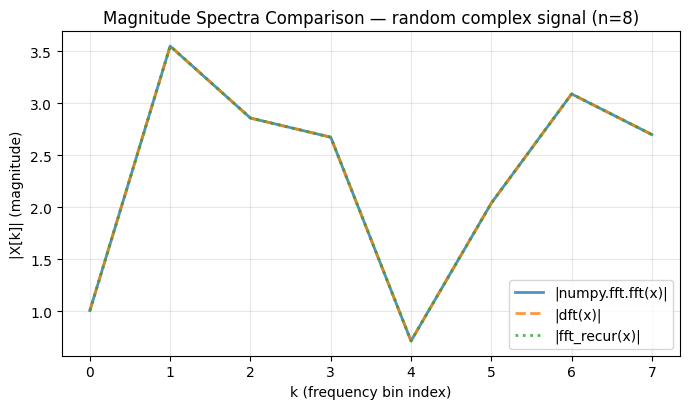


[random real signal (n=16)]
  DFT vs numpy.fft.fft  max|Δ| = 1.896e-14
  IDFT vs x (recon)     max|Δ| = 4.696e-15
  fft_recur vs numpy    max|Δ| = 4.578e-16
  ifft_recur vs x       max|Δ| = 2.222e-16


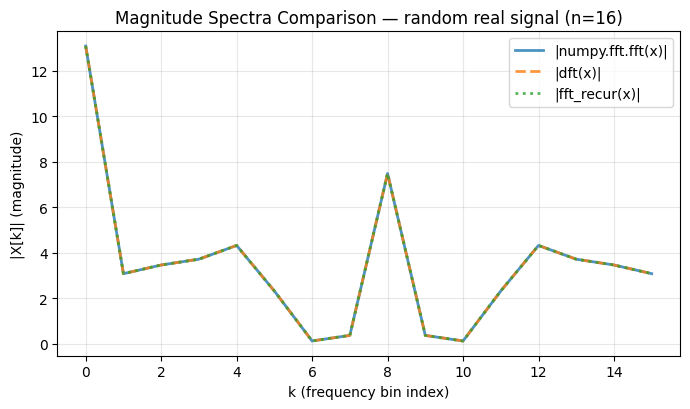


[random complex signal (n=12)]
  DFT vs numpy.fft.fft  max|Δ| = 2.389e-14
  IDFT vs x (recon)     max|Δ| = 4.131e-15


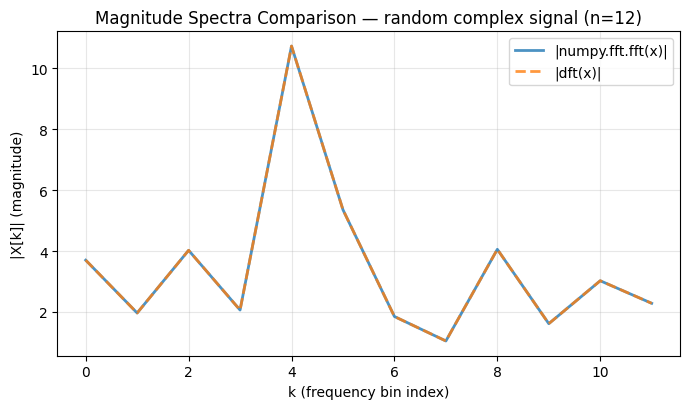

In [ ]:
# Test cases with different input types and lengths
rng = np.random.default_rng(7)

# 1) Complex signal (n=8, power of 2)
x8 = rng.standard_normal(8) + 1j * rng.standard_normal(8)
compare_to_numpy(x8, "random complex signal (n=8)")

# 2) Real signal (n=16, power of 2)
x16 = rng.standard_normal(16)
compare_to_numpy(x16, "random real signal (n=16)")

# 3) Complex signal (n=12, not a power of 2 → our FFT excluded)
x12 = rng.standard_normal(12) + 1j * rng.standard_normal(12)
compare_to_numpy(x12, "random complex signal (n=12)")